In [2]:
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt 

path = 'DataScience_salaries_2024.csv'

salaries_df = pd.read_csv(path)

salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


## Does the compay size influence the salary?

Statistics of Salary by Company Size:
------------------------------------------------------------
Company Size    Count      Mean       Std        Min        25%        50%        75%       
------------------------------------------------------------
L               983        139602.46  74183.85   15000.0    79833.0    136000.0   200000.0   423000.0  
M               13674      151450.54  68295.97   15000.0    105000.0   143150.0   186000.0   800000.0  
S               181        86614.57   58501.97   15809.0    50000.0    70179.0    114047.0   416000.0  
------------------------------------------------------------


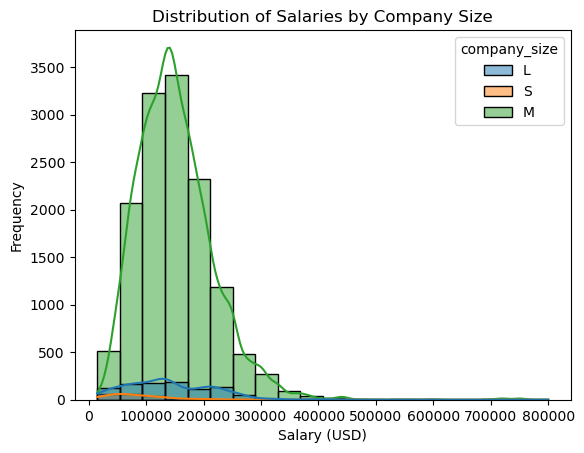

<Axes: title={'center': 'Mean Salary by Company Size'}, xlabel='Company Size', ylabel='Mean Salary'>

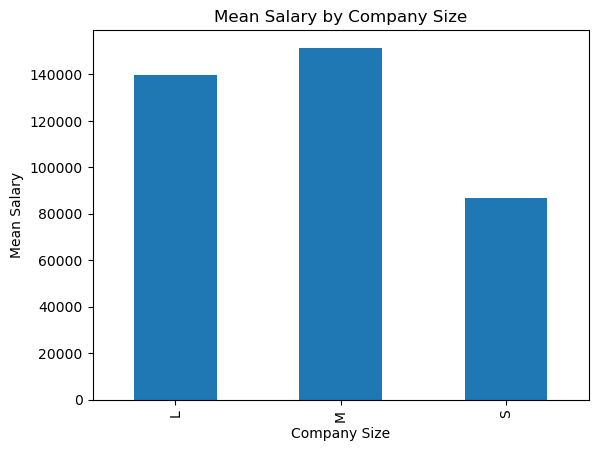

In [16]:
# Calcular estadísticas descriptivas del salario por tamaño de empresa
salaries_by_company_size = salaries_df.groupby('company_size')['salary_in_usd'].describe()

# Imprimir las estadísticas de salario por tamaño de empresa en forma de tabla
print("Statistics of Salary by Company Size:")
print("-" * 60)
print("{:<15} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format("Company Size", "Count", "Mean", "Std", "Min", "25%", "50%", "75%", "Max"))
print("-" * 60)

for company_size, stats in salaries_by_company_size.iterrows():
    count = int(stats['count'])
    mean = round(stats['mean'], 2)
    std = round(stats['std'], 2)
    min_salary = round(stats['min'], 2)
    percentile_25 = round(stats['25%'], 2)
    median = round(stats['50%'], 2)
    percentile_75 = round(stats['75%'], 2)
    max_salary = round(stats['max'], 2)
    print("{:<15} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(company_size, count, mean, std, min_salary, percentile_25, median, percentile_75, max_salary))

print("-" * 60)


# Histograma de distribución de salarios por tamaño de empresa
sns.histplot(data=salaries_df, x='salary_in_usd', hue='company_size', kde=True, bins=20)
plt.title('Distribution of Salaries by Company Size')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

#Bar Graph
salaries_by_company_size['mean'].plot(kind='bar', xlabel='Company Size', ylabel='Mean Salary', title='Mean Salary by Company Size')



## How much does remote or in-site job impact salary?

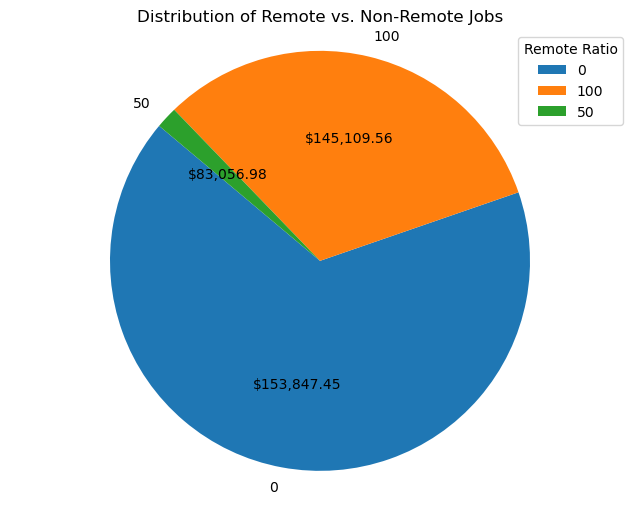

In [31]:

# Calcular la proporción de trabajos presenciales y remotos
remote_ratio_counts = salaries_df['remote_ratio'].value_counts(normalize=True) * 100

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(remote_ratio_counts, labels=remote_ratio_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Remote vs. Non-Remote Jobs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Agregar los valores de los salarios a cada sección del pastel
for i, autotext in enumerate(autotexts):
    autotext.set_text(f"${salaries_df[salaries_df['remote_ratio'] == remote_ratio_counts.index[i]]['salary_in_usd'].mean():,.2f}")

# Agregar leyenda
plt.legend(title="Remote Ratio", loc="best")

plt.show()




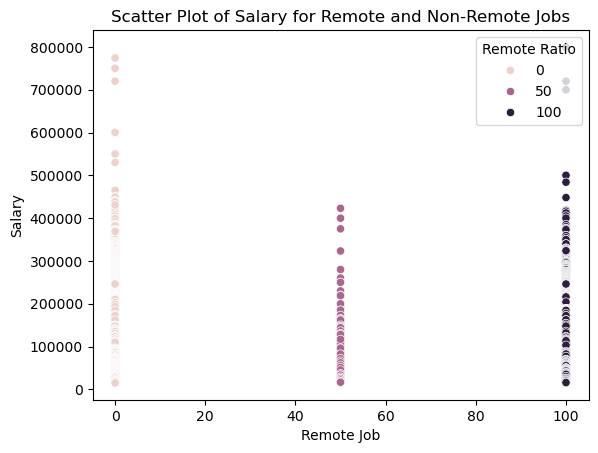

In [35]:
sns.scatterplot(x='remote_ratio', y='salary_in_usd', data=salaries_df, hue='remote_ratio')
plt.xlabel('Remote Job')
plt.ylabel('Salary')
plt.title('Scatter Plot of Salary for Remote and Non-Remote Jobs')
plt.legend(title='Remote Ratio', loc='upper right')
plt.show()


In [43]:
# Convertir variables categóricas en variables dummy
salaries_df_encoded = pd.get_dummies(salaries_df[['remote_ratio', 'experience_level', 'company_size', 'salary_in_usd']], columns=['experience_level', 'company_size'])

# Calcular la matriz de correlación
correlation_matrix = salaries_df_encoded.corr()

# Imprimir la matriz de correlación
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                     remote_ratio  salary_in_usd  experience_level_EN  \
remote_ratio             1.000000      -0.064829             0.003207   
salary_in_usd           -0.064829       1.000000            -0.244306   
experience_level_EN      0.003207      -0.244306             1.000000   
experience_level_EX      0.018804       0.113764            -0.050682   
experience_level_MI     -0.040250      -0.199118            -0.162486   
experience_level_SE      0.027585       0.275133            -0.397649   
company_size_L           0.018632      -0.039650             0.050655   
company_size_M          -0.052123       0.078268            -0.081566   
company_size_S           0.085455      -0.101872             0.085016   

                     experience_level_EX  experience_level_MI  \
remote_ratio                    0.018804            -0.040250   
salary_in_usd                   0.113764            -0.199118   
experience_level_EN            -0.050682            -0